In [164]:
import os
import pickle
import pprint
import matplotlib.pyplot as plt

data_path = "./agents/f1/logs/qlearn_models/qlearn_camera_solved/"
available_folders = ["1", "3"]
circuits = ["simple_circuit", "nurburgring", "montreal"]

In [249]:
def read_pkl(file):
    # print(file)
    qlearn_file = open(file, 'rb')
    model = pickle.load(qlearn_file)
    
    return model

q_table = []
states_counter = []
states_cum_reward = []
states_steps = []

SHOW_PRINTS = False





circuits = ["simple_circuit", "nurburgring", "montreal"]
label_circuit = ["Circuito Simple", "Nürburgring", "Montreal"]
current_label_circuit = label_circuit[0]
CIRCUIT = circuits[0]

action_group = ["simple", "medium", "hard"]
CURRENT_ACTION = action_set[0]

POI = 1

folders = os.listdir(os.path.join(data_path, circuit))
if SHOW_PRINTS: print(f"Folders: {folders}")

current_group_expermiments_path = ""
for folder in folders:
    folder_action = folder.split("__")[-1]
    current_poi = folder.split("_")[0]
    
    if CURRENT_ACTION == folder_action and int(current_poi) == POI:
        if SHOW_PRINTS: print(f"FOLDER: {folder} - FOLDER ACTION: {folder_action} - CURRENT POI: {current_poi}")
        current_group_expermiments_path = os.path.join(data_path, CIRCUIT, folder)
        
if SHOW_PRINTS: print(f"Current group experiments: {sorted(os.listdir(current_group_expermiments_path))}")

for experiment_path in sorted(os.listdir(current_group_expermiments_path)):
    
    path_to_experiment = os.path.join(current_group_expermiments_path, experiment_path)
    if SHOW_PRINTS: print(f"experiment: {os.path.join(current_group_expermiments_path, experiment_path)}")
    
    files = sorted(os.listdir(path_to_experiment))
    if SHOW_PRINTS: print(f" Files in experiment path: {files}")
        
    if len(files) > 1:
        q_table.append(read_pkl(os.path.join(path_to_experiment, files[0])))
        states_counter.append(read_pkl(os.path.join(path_to_experiment, files[1])))
        states_cum_reward.append(read_pkl(os.path.join(path_to_experiment, files[2])))
        check_type = read_pkl(os.path.join(path_to_experiment, files[3]))
        if type(check_type) == dict:
            states_steps.append(check_type)

        if SHOW_PRINTS: print("readed")

print(f"READED --> CIRCUIT: {CIRCUIT} - ACTION SET: {CURRENT_ACTION} - POI: {POI}")

#print(len(states_counter[0]))
#print(states_cum_reward)
#print(states_steps)
print(q_table[0])

READED --> CIRCUIT: simple_circuit - ACTION SET: simple - POI: 1
{('-3', 2): 46.96201592488879, ('-1', 1): -12.999493985432515, ('-2', 2): 65.10745319983371, ('-5', 2): -71.63549547209811, ('-4', 2): 32.711535744460114, ('6', 0): -63.94536544265656, ('8', 2): -158.3022766827778, ('7', 1): 14.085411385476228, ('-7', 2): -28.908184687246816, ('-1', 0): 63.432264919518005, ('4', 2): -25.951228326798784, ('-4', 1): -44.9148890885815, ('-6', 2): -114.95416891875325, ('-5', 0): -62.46953941600057, ('8', 1): -141.58612342997674, ('5', 2): -68.74243211104917, ('-3', 0): -41.22983490364681, ('-1', 2): -8.306678614052245, ('7', 2): -82.78583887139555, ('4', 1): 33.41303553564985, ('-4', 0): -49.347586268873506, ('-2', 1): -9.645378625010707, ('6', 2): -69.06187711179244, ('5', 0): -67.98106740671182, ('-5', 1): -112.15722869230727, ('8', 0): 62.57273933802267, ('-2', 0): -15.915063289159015, ('-3', 1): -43.628956324587946, ('-6', 1): -115.3484428861704, ('-7', 0): -34.764160390267264, ('4', 0): 

# DATOS CARGADOS --> GRÁFICAS

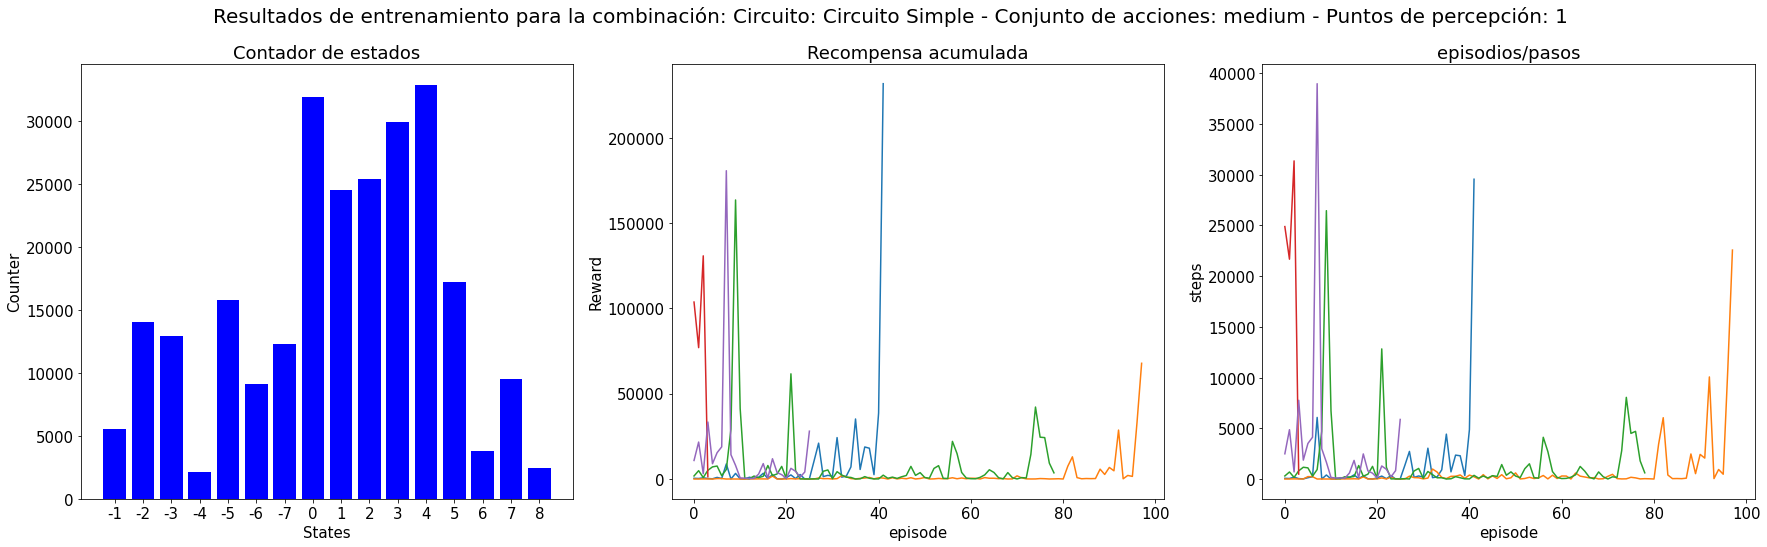

In [210]:
plt.rcParams.update({'font.size': 15})

fig, axs = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle(f"Resultados de entrenamiento para la combinación: Circuito: {current_label_circuit} - Conjunto de acciones: {CURRENT_ACTION} - Puntos de percepción: {POI}", fontsize=20)

for i in range(len(states_counter)):
    axs[0].bar(list(sorted(states_counter[i].keys())), list(states_counter[i].values()), color="blue")
for j in range(len(states_cum_reward)):
    axs[1].plot(list(states_cum_reward[j].keys()), list(states_cum_reward[j].values()))
for k in range(len(states_steps)):
    axs[2].plot(list(states_steps[k].keys()), list(states_steps[k].values()))


axs[0].set_title('Contador de estados')
axs[1].set_title('Recompensa acumulada')
axs[2].set_title('episodios/pasos')

# for ax in axs.flat:
axs[0].set(xlabel='States', ylabel='Counter')
axs[1].set(xlabel='episode', ylabel='Reward')
axs[2].set(xlabel='episode', ylabel='steps')

SAVE = False
if SAVE:
    file_name = "training_metrics_actions_{}"
    plt.savefig('foo.png')

# Aquí se sacan los valores máximos o más frecuente

In [205]:
# states_counter
# max_states_cum_reward
# max_states_steps

max_states_counter = max(states_counter, key=states_counter.get)
print(max_states_counter)
print(f"state: {max_states_counter} - times: {states_counter['0-2-6']}")

AttributeError: 'list' object has no attribute 'get'

In [ ]:
model['-1-3-6']

In [33]:
sorted(model, key=model.get, reverse=True)

['0-2-6',
 '-1-3-6',
 '-1-2-4',
 '-1-2-5',
 '0-2-5',
 '0-1-3',
 '0-1-4',
 '247',
 '223',
 '-2-3-6',
 '335',
 '111',
 '148',
 '-1-3-7',
 '158',
 '10-2',
 '10-1',
 '236',
 '110',
 '-2-4-7',
 '235',
 '268',
 '258',
 '00-1',
 '0-1-2',
 '-1-4-7',
 '124',
 '-1-1-2',
 '-1-1-3',
 '347',
 '137',
 '-1-2-6',
 '358',
 '334',
 '-2-3-5',
 '012',
 '222',
 '212',
 '0-3-6',
 '0-1-5',
 '211',
 '000',
 '1-1-4',
 '234',
 '357',
 '048',
 '324',
 '125',
 '-2-4-6',
 '-2-2-4',
 '323',
 '224',
 '123',
 '346',
 '136',
 '336',
 '-1-1-1',
 '00-2',
 '-1-2-3',
 '-100',
 '013',
 '135',
 '246',
 '446',
 '112',
 '001',
 '058',
 '10-3',
 '1-1-3',
 '168',
 '447',
 '368',
 '210',
 '037',
 '-1-3-5',
 '122',
 '-1-48',
 '024',
 '0-2-4',
 '-2-2-5',
 '100',
 '147',
 '-10-1',
 '11-1',
 '278',
 '011',
 '-2-58',
 '1-1-5',
 '068',
 '0-3-7',
 '-3-4-6',
 '-2-2-3',
 '-3-5-7',
 '-101',
 '21-1',
 '025',
 '322',
 '113',
 '-137',
 '-1-1-4',
 '20-2',
 '468',
 '-3-3-6',
 '-3-58',
 '-3-4-7',
 '1-2-6',
 '-138',
 '038',
 '248',
 '435',
 '-2-

In [41]:
!pwd

/home/nachoaz/igarag/TFM/metrics


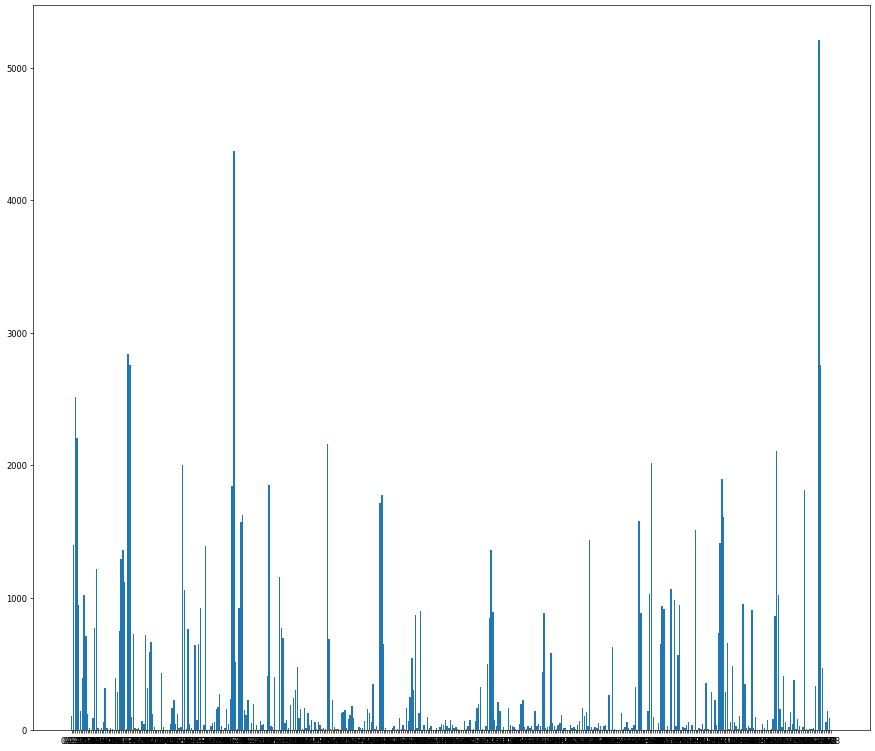

In [26]:
fig = plt.figure(figsize=(18, 16), dpi=60, facecolor='w', edgecolor='k')

plt.bar(range(len(model)), list(model.values()), align='center')
plt.xticks(range(len(model)), list(model.keys()))
plt.show()

In [36]:
len(model)

241

## ODOMETRIA

In [236]:
import os
import pickle
import pprint
import numpy as np
import matplotlib.pyplot as plt

data_path = "./agents/f1/logs/qlearn_models/qlearn_camera_solved/"
available_folders = ["1", "3"]

circuits = ["simple_circuit", "nurburgring", "montreal"]
label_circuit = ["Circuito Simple", "Nürburgring", "Montreal"]
current_label_circuit = label_circuit[0]
CIRCUIT = circuits[0]

action_group = ["simple", "medium", "hard"]
CURRENT_ACTION = action_set[1]

POI = "1"

def read_pkl(file):
    print(file)
    qlearn_file = open(file, 'rb')
    model = pickle.load(qlearn_file)
    
    return model

experiments = ["1", "2", "3", "4", "5"]
experiment = experiments[0]
# manual_coords = read_pkl(os.path.join(data_path, + 'manual_pilot_checkpoints.pkl')
folder_inference_path = os.path.join(data_path, circuit, POI + "_point__actions_set__" + CURRENT_ACTION, experiment)
inference_file = sorted(os.listdir(os.path.join(inference_path)))[-1]
inference_path = os.path.join(folder_inference_path, inference_file)
print(f"Folder Inference Path: {folder_inference_path}")
print(f"Inference File: {inference_file}")
print(f"Inference Path: {inference_path}")

inference_file = os.path.join(folders)
print(inference_file)
rl_coords = read_pkl(data_path + 'actions_simple_checkpoints.pkl')

print(manual_coords[0])
print(rl_coords[0])

manual_points = np.array([list(pos[1]) for pos in manual])
rl_points = np.array([list(pos[1]) for pos in rl_simple])

print(f"LEN MANUAL POINTS: {len(manual_points)}")
print(f"LEN ALGORITHM POINTS: {len(rl_points)}")

Folder Inference Path: ./agents/f1/logs/qlearn_models/qlearn_camera_solved/nurburgring/1_point__actions_set__medium/1
Inference File: 5_checkpoints_1_point__actions_set__medium_1_tested_on_simple_circuit_time_0:03:50.982477.pkl
Inference Path: ./agents/f1/logs/qlearn_models/qlearn_camera_solved/nurburgring/1_point__actions_set__medium/1/5_checkpoints_1_point__actions_set__medium_1_tested_on_simple_circuit_time_0:03:50.982477.pkl


TypeError: expected str, bytes or os.PathLike object, not list

In [118]:
from scipy.spatial import distance
import numpy as np

max_dist = 5

result = []
manual_points_counter = np.copy(manual_points)

for idx, rl_point in enumerate(rl_points):
    dist = (manual_points_counter - rl_point)**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)

    if min(dist) < max_dist and not len(result) >= len(manual_points):
        result.append([min(dist), rl_coords[idx][1]])
        manual_points_counter = np.delete(manual_points_counter, 0, axis=0)

        
if len(result) == len(manual_points):
    print("LAP COMPLETED")
else:
    percentage_lap_completed = len(manual_points) / len(result)
    print("The car has complete the {percentage_lap_completed} % of the circuit")

len de manual_points: 51
LAP COMPLETED
